# Creación y manipulación de Series

## Creación de una serie

Las series en Pandas vendrian a ser algo así como una columna de una tabla. La columna tendrá datos por un lado e indices por el otro. Los indices nos permitirán identificar a qué "fila" pertenece cada dato de la serie. Pandas esta construido sobre Numpy

In [2]:
import pandas as pd

In [1]:
indices = ["Juan", "Maria", "Francisco", "Pedro", "Luis"]
datos_lista = [40, 20, 36, 34, 20] # edad de cada persona

In [5]:
edades = pd.Series(datos_lista) # el indice por defecto lo coloca numericamente empezando por el indice 0
edades

0    40
1    20
2    36
3    34
4    20
dtype: int64

In [6]:
edades = pd.Series(datos_lista, index=indices)
edades

Juan         40
Maria        20
Francisco    36
Pedro        34
Luis         20
dtype: int64

In [8]:
datos = {
    "Juan": 40, 
    "Maria": 20, 
    "Francisco": 36, 
    "Pedro": 34, 
    "Luis": 20
}

edades = pd.Series(datos) # si se crea a partir de un diccionario, ya toma cada clave del dccionario como indice
edades

Juan         40
Maria        20
Francisco    36
Pedro        34
Luis         20
dtype: int64

## Atributos y acceso a los elementos de una Serie

In [10]:
edades.dtype, edades.size, edades.index, edades.values # igual que en numpy

(dtype('int64'),
 5,
 Index(['Juan', 'Maria', 'Francisco', 'Pedro', 'Luis'], dtype='object'),
 array([40, 20, 36, 34, 20]))

In [14]:
for idx, elem in zip(edades.index, edades.values):
    print(idx, "->", elem)

Juan -> 40
Maria -> 20
Francisco -> 36
Pedro -> 34
Luis -> 20


Acceder a un dato en particular con su indice:

In [16]:
edades["Juan"]

40

In [17]:
edades[["Juan", "Francisco"]]

Juan         40
Francisco    36
dtype: int64

Accediendo con indices como las listas, aunque esto esta deprecado:

In [19]:
edades[0], edades[0:2], edades[[0,2]]

/var/folders/f_/3h5g_rx13336x99h7_n9bc9c0000gp/T/ipykernel_12878/3827722765.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edades[0], edades[0:2], edades[[0,2]]


(40,
 Juan     40
 Maria    20
 dtype: int64,
 Juan         40
 Francisco    36
 dtype: int64)

Esta es la forma mas moderna y aceptada de acceder con indices numericos como las listas:

In [22]:
edades.iloc[0], edades.iloc[0:2], edades.iloc[[0, 2]]

(40,
 Juan     40
 Maria    20
 dtype: int64,
 Juan         40
 Francisco    36
 dtype: int64)

## Métodos básicos comunes

In [24]:
edades.astype("i2") # cambiamos el tipo de dato a int de 2 bytes, como los tipos de numpy

Juan         40
Maria        20
Francisco    36
Pedro        34
Luis         20
dtype: int16

In [25]:
edades.value_counts() # cuenta cuantos datos hay de cada valor de la serie

20    2
40    1
36    1
34    1
Name: count, dtype: int64

In [28]:
edades.sort_values(inplace=True) # el parametro inplace es para indicar que ordene la serie original
edades

Maria        20
Luis         20
Pedro        34
Francisco    36
Juan         40
dtype: int64

In [30]:
edades.sort_index(inplace=True)
edades

Francisco    36
Juan         40
Luis         20
Maria        20
Pedro        34
dtype: int64

## Operaciones vectoriales aritméticas + / - *

In [31]:
edades + 1

Francisco    37
Juan         41
Luis         21
Maria        21
Pedro        35
dtype: int64

In [32]:
edades - 2

Francisco    34
Juan         38
Luis         18
Maria        18
Pedro        32
dtype: int64

In [33]:
edades / 2

Francisco    18.0
Juan         20.0
Luis         10.0
Maria        10.0
Pedro        17.0
dtype: float64

In [34]:
edades * 2

Francisco    72
Juan         80
Luis         40
Maria        40
Pedro        68
dtype: int64

In [35]:
edades + edades

Francisco    72
Juan         80
Luis         40
Maria        40
Pedro        68
dtype: int64

## Funciones de estadística y agregación básicas

In [36]:
edades

Francisco    36
Juan         40
Luis         20
Maria        20
Pedro        34
dtype: int64

In [44]:
edades.max(), edades.argmax(), edades.min(), edades.argmin()

(40, 1, 20, 2)

In [39]:
edades.sum()

150

In [40]:
edades.mode() # Moda: elemento que mas se repite dentro de nuestros datos

0    20
dtype: int64

In [41]:
edades.mean() # promedio

30.0

In [48]:
edades.median() # mediana: se ordenan los datos, y nos devuelve el dato que se encuentra en el medio de los mismos

34.0

In [47]:
edades.std()

9.38083151964686

In [45]:
edades.count() # cuenta la cantidad de elementos (en este caso nos devuelve lo mismo que edades.size)

5

In [49]:
edades.describe()

count     5.000000
mean     30.000000
std       9.380832
min      20.000000
25%      20.000000
50%      34.000000
75%      36.000000
max      40.000000
dtype: float64

In [50]:
edades.quantile(0.25)

20.0

In [51]:
edades.quantile(0.5)

34.0

In [52]:
edades.quantile(0.75)

36.0

<Axes: >

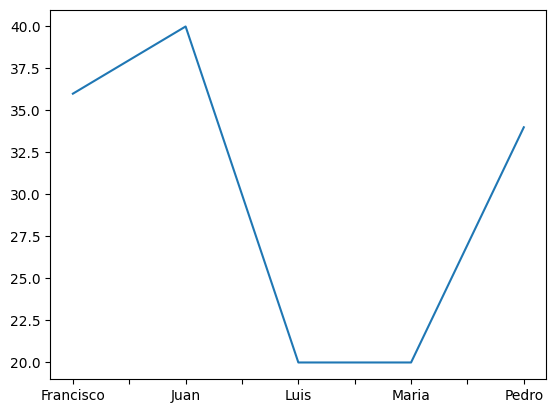

In [53]:
edades.plot()